# Lab No 3: Geovisualization Techniques - Data Viz.

## 4 Challenges

# Challenge No 1

In [1]:
# Here is the code for challenge 1, Lab 3

In [38]:
import pandas as pd

listings =pd.read_csv(r"C:\Users\user\Documents\UA_Lab\Data\LabThree\listings.csv")


#Show column headings
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9784567,https://www.airbnb.com/rooms/9784567,20160704013910,2016-07-04,nice Room in Amsterdam,nice Room 20 Min.to Amst.center 10 minutes wal...,NaN,nice Room 20 Min.to Amst.center 10 minutes wal...,none,nice Park metro in front bus in front,...,8.0,f,NaN,Amsterdam,f,flexible,f,f,3,0.81
1,13163805,https://www.airbnb.com/rooms/13163805,20160704013910,2016-07-04,Best cost benefit room near a metro station,We (me and my wife) are constantly improving o...,NaN,We (me and my wife) are constantly improving o...,none,NaN,...,9.0,f,NaN,Amsterdam,t,flexible,f,f,1,4.00
2,3719167,https://www.airbnb.com/rooms/3719167,20160704013910,2016-07-04,Nice room in A´dam SE near nature & heart centre,I offer a beautiful 19 sqm room in a house on ...,"The location is close to the shops, public tra...",I offer a beautiful 19 sqm room in a house on ...,none,A lot of different internationalities and cult...,...,9.0,f,NaN,Amsterdam,f,moderate,f,f,1,0.48
3,13188367,https://www.airbnb.com/rooms/13188367,20160704013910,2016-07-04,Private room 15min metro ride from city center,The apartment is located a 15min ride from the...,NaN,The apartment is located a 15min ride from the...,none,NaN,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.62
4,4831606,https://www.airbnb.com/rooms/4831606,20160704013910,2016-07-04,Room in Amsterdam in a new house!! Free Bicycle,In Amsterdam Zuidoost (20 minutes to central s...,Smart tv,In Amsterdam Zuidoost (20 minutes to central s...,none,NaN,...,9.0,f,NaN,Amsterdam,f,moderate,f,f,1,0.65


In [39]:
subset_listings = listings[['id', 
                            'neighbourhood_cleansed',
                            'latitude',
                            'longitude',
                            'property_type',
                            'room_type',
                            'bedrooms',
                            'price',
                            'number_of_reviews']]

In [40]:
import numpy as np
import pandas as pd

numericals = subset_listings.select_dtypes('number')
avg = numericals.mean()
count = numericals.count()
table = pd.DataFrame({
    'Numericals': numericals.columns,
    'Average': avg.values, 
    'Counts': count.values
})
print(table)

#reference: Pydata.org. (2024). pandas.DataFrame.select_dtypes — pandas 2.2.3 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes [Accessed 27 Feb. 2025].

          Numericals       Average  Counts
0                 id  7.414648e+06   13849
1           latitude  5.236557e+01   13849
2          longitude  4.889059e+00   13849
3           bedrooms  1.428344e+00   13837
4  number_of_reviews  1.542646e+01   13849


# Challenge No 2

In [41]:
# Here is the code for challenge 2, Lab 3

In [42]:
#chosen problem: parking in Edinburgh city centre

In [43]:
import requests
import numpy as np
import pandas as pd
import geopandas as gpd

#here I had to use the traditional method as opposed to using the API method as it was unavailable for the urban environment problem I wanted to explore
parking_bays = gpd.read_file("data/Parking_Bays/Parking_Bays.shp")
print(parking_bays)

      OBJECTID Zone_No                                           Bay_Type  \
0            1       5                       Resident Permit Parking only   
1            2       5                       Resident Permit Parking only   
2            4      1A                       Resident Permit Parking only   
3            5      1A  Public Parking charged as per tariff on parkin...   
4            6       1                       Resident Permit Parking only   
...        ...     ...                                                ...   
7057      7064     B10                       Resident Permit Parking only   
7058      7065     B10                       Resident Permit Parking only   
7059      7066     B10                       Resident Permit Parking only   
7060      7067     B10                       Resident Permit Parking only   
7061      7068     B10                       Resident Permit Parking only   

            id  Shapearea    Shapelen  \
0     13484622  48.994652   52.998

In [44]:
parking_bays.head()

,OBJECTID,Zone_No,Bay_Type,id,Shapearea,Shapelen,geometry
0,1,5,Resident Permit Parking only,13484622,48.994652,52.998569,"POLYGON ((324328.602 674160.675, 324330.5 6741..."
1,2,5,Resident Permit Parking only,13484628,72.560908,76.569592,"POLYGON ((324242.867 674157.981, 324241.759 67..."
2,4,1A,Resident Permit Parking only,13484684,96.453709,100.481794,"POLYGON ((324475.652 673850.009, 324475.666 67..."
3,5,1A,Public Parking charged as per tariff on parkin...,13485223,32.003651,36.000847,"POLYGON ((325023.426 674031.506, 325008.063 67..."
4,6,1,Resident Permit Parking only,13486228,85.999822,90.009201,"POLYGON ((324125.195 673642.264, 324142.88 673..."


In [45]:
parking_bays.shape

(7062, 7)

<Axes: >

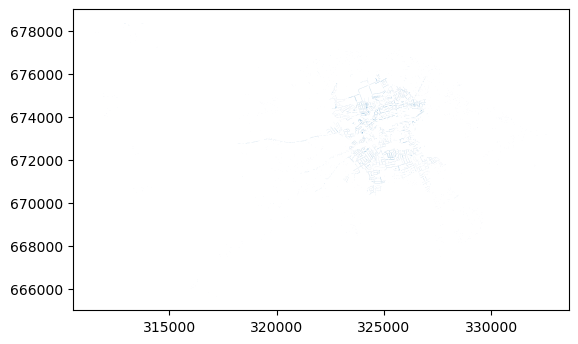

In [46]:
parking_bays.plot()

In [47]:
parking_bays_cleaned = parking_bays.dropna()

In [48]:
parking_bays_cleaned.shape

(5697, 7)

In [49]:
#calculating mean, median and mode using geopandas
parking_bays_cleaned.groupby(

SyntaxError: incomplete input (2782414092.py, line 2)

# Challenge No 3

In [ ]:
# Here is the code for challenge 3, Lab 3

In [ ]:
import requests
import pandas as pd
import geopandas as gpd

url_motor = "https://data.cityofnewyork.us/resource/h9gi-nx95.json"
response = requests.get(url_motor)
response

In [ ]:
data = response.json()
data

In [50]:
motor_pd = pd.DataFrame(data)
motor_pd.head(5)

,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,latitude,longitude,location,contributing_factor_vehicle_3,vehicle_type_code_3,cross_street_name,contributing_factor_vehicle_4,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5
0,2021-09-11T00:00:00.000,2:39,WHITESTONE EXPRESSWAY,20 AVENUE,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-26T00:00:00.000,11:45,QUEENSBORO BRIDGE UPPER,NaN,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-11-01T00:00:00.000,1:29,OCEAN PARKWAY,AVENUE K,1,0,0,0,0,0,...,40.62179,-73.970024,"{'latitude': '40.62179', 'longitude': '-73.970...",Unspecified,Sedan,NaN,NaN,NaN,NaN,NaN
3,2022-06-29T00:00:00.000,6:55,THROGS NECK BRIDGE,NaN,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-09-21T00:00:00.000,13:21,BROOKLYN BRIDGE,NaN,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
motor_pd.shape

(1000, 29)

In [52]:
motor_pd_geo = gpd.GeoDataFrame(motor_pd, geometry=gpd.points_from_xy(motor_pd['latitude'], motor_pd['longitude']))

In [53]:
motor_pd_geo.crs

In [54]:
motor_pd_geo = motor_pd_geo.set_crs("EPSG:4326")

In [55]:
motor_pd_geo.explore()

In [56]:
motor_pd.columns

Index(['crash_date', 'crash_time', 'on_street_name', 'off_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2', 'borough',
       'zip_code', 'latitude', 'longitude', 'location',
       'contributing_factor_vehicle_3', 'vehicle_type_code_3',
       'cross_street_name', 'contributing_factor_vehicle_4',
       'vehicle_type_code_4', 'contributing_factor_vehicle_5',
       'vehicle_type_code_5'],
      dtype='object')

In [57]:
number_of_persons_killed = motor_pd['number_of_pedestrians_killed']
number_of_persons_killed.head()

0    0
1    0
2    0
3    0
4    0
Name: number_of_pedestrians_killed, dtype: object

In [58]:
number_of_persons_killed.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: number_of_pedestrians_killed
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [59]:
number_of_cyclist_killed = motor_pd['number_of_cyclist_killed']
number_of_cyclist_killed.head()

0    0
1    0
2    0
3    0
4    0
Name: number_of_cyclist_killed, dtype: object

In [60]:
number_of_cyclist_killed.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: number_of_cyclist_killed
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [61]:
keep_cols = [
    "number_of_persons_killed",
    "number_of_cyclist_killed",
]
motor_pd_filtered = motor_pd[keep_cols]
motor_pd_filtered.head()

,number_of_persons_killed,number_of_cyclist_killed
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [62]:
motor_pd_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   number_of_persons_killed  1000 non-null   object
 1   number_of_cyclist_killed  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [63]:
motor_pd['nummber_of_persons_killed'] = motor_pd['number_of_persons_killed'].astype(int)
motor_pd['nummber_of_cyclist_killed'] = motor_pd['number_of_cyclist_killed'].astype(int)

if 'crash_date' in motor_pd.columns:
    motor_pd['crash_date'] = pd.to_datetime(motor_pd['crash_date'])

motor_pd_geo = gpd.GeoDataFrame(
    motor_pd, 
    geometry=gpd.points_from_xy(motor_pd['longitude'], motor_pd['latitude'])
)

motor_pd_geo = motor_pd_geo.set_crs("EPSG:4326")

keep_cols = ["number_of_persons_killed", "number_of_cyclist_killed", "geometry"]
motor_pd_filtered = motor_pd_geo[keep_cols]

motor_pd_filtered.explore()


In [64]:
motor_pd.describe()

,crash_date,nummber_of_persons_killed,nummber_of_cyclist_killed
count,1000,1000.000000,1000.0
mean,2021-07-27 14:35:31.200000,0.004000,0.0
min,2016-04-16 00:00:00,0.000000,0.0
25%,2021-04-14 00:00:00,0.000000,0.0
50%,2021-04-16 00:00:00,0.000000,0.0
75%,2021-09-11 00:00:00,0.000000,0.0
max,2023-11-02 00:00:00,1.000000,0.0
std,NaN,0.063151,0.0


In [65]:
#calculating the mean, standard deviation for two attributes
#changing from strings to numeric values
motor_pd["number_of_persons_injured"] = pd.to_numeric(motor_pd["number_of_persons_injured"], errors="coerce")
motor_pd["number_of_cyclist_injured"] = pd.to_numeric(motor_pd["number_of_cyclist_injured"], errors="coerce")
#I chose number of persons injured and number of cyclists injured to see how they compared to our previous analysis of number of persons killed and number of cyclists killed
mean_injuries = motor_pd["number_of_persons_injured"].mean()
std_injuries = motor_pd["number_of_persons_injured"].std()
mean_injuries_cyclist = motor_pd["number_of_cyclist_injured"].mean()
std_injuries_cyclist = motor_pd["number_of_cyclist_injured"].std()

print(mean_injuries)
print(std_injuries)
print(mean_injuries_cyclist)
print(std_injuries_cyclist)

0.448
0.7796819248282623
0.038
0.19129190414806527


In [66]:
# Here is the code for challenge 4, Lab 3

1. I have found datashader to be more of 